## Desafio

Criar um modelo para prever nota da prova de matemática (coluna `NU_NOTA_MT`) de quem participou do ENEM 2016 com base nos dados disponíveis nos arquivos train.csv e teste.csv. A resposta foi salva em um arquivo chamado answer.csv com duas colunas: `NU_INSCRICAO` e `NU_NOTA_MT`.

Obs: Qualquer dúvida a respeito das colunas, consulte o [Dicionário dos Microdados do Enem 2016](https://s3-us-west-1.amazonaws.com/acceleration-assets-highway/data-science/dicionario-de-dados.zip).

In [1]:
#Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor

In [2]:
# Configuraçãoes do Matplotlib
plt.rc("figure", figsize=(10, 6))
sns.set(style="dark", palette="Accent")

### Análise Exploratória dos Dados

Para começar a analise, os dois datasets foram importados para averiguar quais são as features em comum.

In [3]:
df_train = pd.read_csv('train.csv', index_col=0)
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,...,5.0,A,A,A,A,A,A,A,B,D
2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,...,NaN,A,A,C,A,B,A,A,C,A
3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,...,NaN,A,A,A,A,C,A,A,B,A
4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,...,5.0,C,A,A,A,A,D,A,A,A
5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,...,NaN,A,A,A,A,A,A,A,A,A


df_train.columns.tolist()

In [5]:
print(f'Shape do df de train: {df_train.shape}\nShape do df de test: {df_test.shape}') 

Shape do df de train: (13730, 166)
Shape do df de test: (4576, 47)


Nota-se que o conjundo de dados de treino possui 13730 registros e  166 colunas. Enquanto, o conjundo de dados de teste possui somente 4576 registros e  47 colunas.

### Analise do comportamento da variável alvo 'NU_NOTA_MT'

In [6]:
df_train[['NU_NOTA_MT']].describe()

,NU_NOTA_MT
count,10133.000000
mean,482.497928
std,99.826323
min,0.000000
25%,408.900000
50%,461.200000
75%,537.600000
max,952.000000


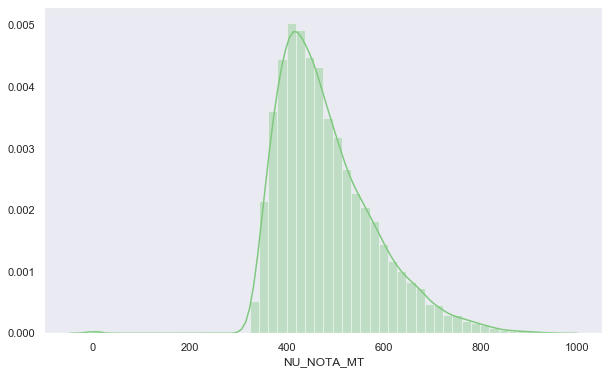

In [7]:
sns.distplot(df_train['NU_NOTA_MT'])

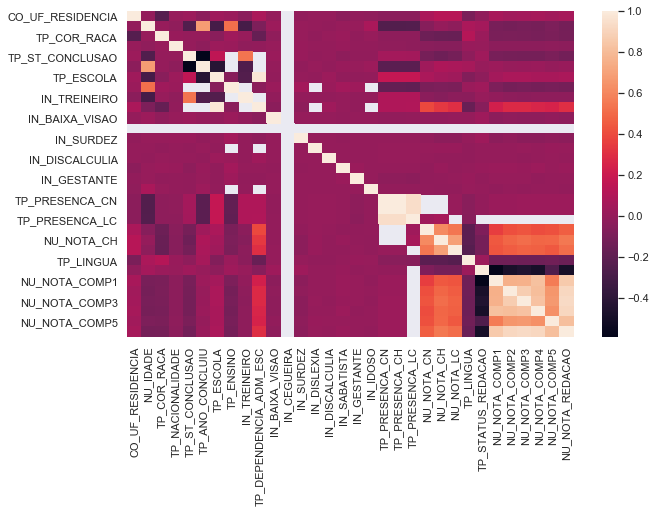

In [8]:
sns.heatmap(df_train[df_test.columns].corr())

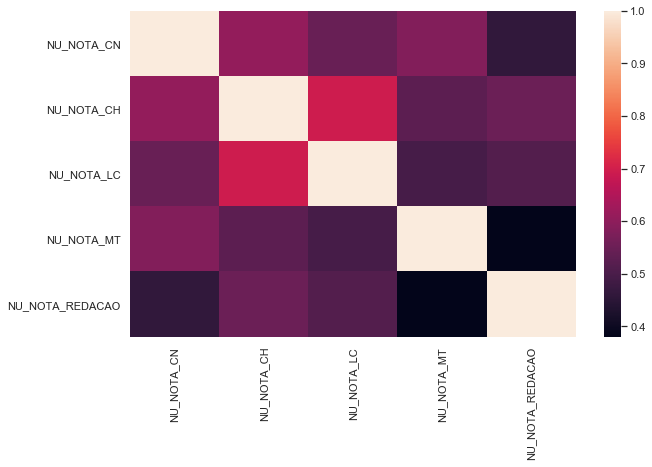

In [9]:
sns.heatmap(df_train[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].corr())

### Feature Selection e Feature Engineering

In [10]:
# varificando valores faltantes da coluna'NU_NOTA_MT'
df_train['NU_NOTA_MT'].isna().sum()

3597

In [11]:
# removendo todos os valores nulos da coluna'NU_NOTA_MT'
df_train = df_train.dropna( how='all', subset=['NU_NOTA_MT'] )
df_train['NU_NOTA_MT'].isna().sum()

0

In [12]:
# Através da analisé da matrix de correlação as seguintes colunas foram selecionadas como features
features = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

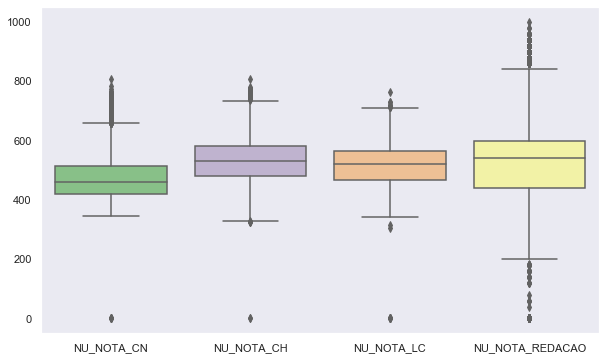

In [13]:
sns.boxplot(data=df_train[features])

In [14]:
df_train[features].isna().sum()

NU_NOTA_CN         36
NU_NOTA_CH         36
NU_NOTA_LC          0
NU_NOTA_REDACAO     0
dtype: int64

In [15]:
df_train[features] = df_train[features].fillna(-1)
df_train[features].isna().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
dtype: int64

### Criação e treino do modelo de Machine Learning
 
Para este desafio foi escolhido o Random Forest, um algoritmo de aprendizagem supervisionada. O Random Forest cria uma floresta de um modo aleatório. Sendo que, esta “floresta” criado é uma combinação (ensemble) de árvores de decisão, na maioria dos casos treinados com o método de bagging. A idéia principal do método de bagging é que a combinação dos modelos de aprendizado aumenta o resultado geral.

In [16]:
x = df_train[features]
y = df_train['NU_NOTA_MT']

In [17]:
# modelando
forest = RandomForestRegressor(max_depth=12, min_samples_leaf=5)
forest_fit = forest.fit(x, y)

In [18]:
# predição
df_test[features] = df_test[features].fillna(-1)
predict = forest_fit.predict( df_test[features] )

Salvando as predições feitas no arquivo answer.csv para submeter na plataforma da Codenation

In [19]:
answer = df_test[['NU_INSCRICAO']].copy()
answer['NU_NOTA_MT'] = predict

In [20]:
answer.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,426.752148
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,437.269930
2,b38a03232f43b11c9d0788abaf060f7366053b6d,599.567887
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,99.700118
4,715494628a50142ce8cb17191cfe6d0f3cae0934,534.954019


In [21]:
answer.to_csv('answer.csv', index=False)